In [1]:
pip install imblearn spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 26.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


First run with spacy
Run with Word2vec

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

In [3]:
df = pd.read_csv('/data/notebook_files/tripadvisor_hotel_reviews.csv')

In [4]:
df.iloc[:,1].value_counts()

5 9054
4 6039
3 2184
2 1793
1 1421
Name: Rating, dtype: int64

In [5]:
df.isna().sum()

Review 0
Rating 0
dtype: int64

In [6]:
!python -m spacy download en_core_web_lg 

2023-06-12 14:36:39.796691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [7]:
nlp = spacy.load("en_core_web_lg")

def preprocess(text):
  doc = nlp(text)

  filtered_token = []
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    filtered_token.append(token.lemma_)

  return(' '.join(filtered_token))

In [8]:
preprocess('my trip was ruined because someone robbed me')

'trip ruin rob'

In [9]:
df['Preprocessed_Review'] = df['Review'].apply(lambda x: preprocess(x))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

In [11]:
df['Preprocessed_Review'] = df['Preprocessed_Review'].apply(lambda x : x.strip())

In [127]:
import gensim.downloader as api
wv = api.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [129]:
nlp = spacy.load("en_core_web_lg")

def preprocess(text):
  doc = nlp(text)

  filtered_token = []
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    filtered_token.append(token.lemma_)

  return(wv.get_mean_vector(filtered_token))

In [130]:
df['Gensnim_vector'] = df['Review'].apply(lambda x: preprocess(x))

In [131]:
df

,Review,Rating,Preprocessed_Review,spacy_vectors,Gensnim_vector
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,"[0.18028633, 1.0664271, -2.634105, -0.08633499...","[-0.014720408, -0.010043328, 0.0011006314, 0.0..."
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,"[-0.10305005, 0.025253873, -1.6846557, 0.15054...","[-0.010541894, -0.00069436536, -0.0042530587, ..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice room 4 experience hotel monaco seattle go...,"[0.070874386, 0.408771, -2.0989778, 0.3434877,...","[-0.017286377, -0.0051590456, -0.0013687223, -..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[-0.62546104, 0.31182808, -2.3708231, -1.31422...","[-0.023345836, -0.0135795465, -0.007060945, 0...."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,"[0.13427533, 0.5242932, -2.03337, -0.2992526, ...","[-0.019075043, 0.006933731, -0.0013371886, -0...."
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,well keep secret 3rd time stay charm 5 star be...,"[0.16165966, 0.5383857, -2.3016937, 0.28018928...","[-0.022436256, -0.00653919, 0.0014375063, -0.0..."
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,"[0.05224797, 1.0018412, -2.4317873, -0.6122285...","[-0.018428793, -0.0042757313, 0.016121613, -0...."
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff particu...,"[0.24291632, 1.1665498, -2.2195015, -0.1568697...","[-0.008885436, -0.01317842, -0.0073645045, 0.0..."
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacation hotel open sept 17 2...,"[-0.23386347, 0.5327769, -2.0057182, -0.341541...","[-0.010881783, 0.0067569395, -0.004603099, -0...."


In [165]:
X = df['Gensnim_vector']
Y = df['Rating']

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

In [167]:
X_train = np.stack(np.array(X_train))
X_test = np.stack(np.array(X_test))

In [168]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

X_oversampled, y_oversampled = oversampler.fit_resample(X_train, Y_train)

X_test_oversampled, y_test_oversampled = oversampler.fit_resample(X_test, Y_test)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

model1 = ('Multinomial', MultinomialNB())
model2 = ('LogisticRegression', LogisticRegression())
model3 = ('RandomForest', RandomForestClassifier())
model4 = ('SVM', SVC())
model5 = ('KNN', KNeighborsClassifier())
model6 = ('AdaBoost', AdaBoostClassifier())

ensemble_model = VotingClassifier(estimators=[model1, model2, model3, model4, model5, model6], voting='hard')

clf = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    #('Multinomial', MultinomialNB())
    ('Ensemble', ensemble_model)
])

In [4]:
clf

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
 ('Ensemble',
 VotingClassifier(estimators=[('Multinomial', MultinomialNB()),
 ('LogisticRegression',
 LogisticRegression()),
 ('RandomForest',
 RandomForestClassifier()),
 ('SVM', SVC()),
 ('KNN', KNeighborsClassifier()),
 ('AdaBoost',
 AdaBoostClassifier())]))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
 ('Ensemble',
 VotingClassifier(estimators=[('Multinomial', MultinomialNB()),
 ('LogisticRegression',
 LogisticRegression()),
 ('RandomForest',
 RandomForestClassifier()),
 ('SVM', SVC()),
 ('KNN', KNeighborsClassifier()),
 ('AdaBoost',
 AdaBoostClassifier())]))]) TfidfVectorizer TfidfVectorizer() Ensemble: VotingClassifier VotingClassifier(estimators=[('Multinomial', MultinomialNB()),
 ('LogisticRegression', LogisticRegression()),
 ('RandomForest', RandomForestClassifier()),
 ('SVM', SVC()), ('KNN', KNeighborsClassifier()),
 ('AdaBoost', AdaBoostClassifier())]) Multinomial MultinomialNB MultinomialNB() LogisticRegression LogisticRegression LogisticRegression() RandomForest RandomForestClassifier RandomForestClassifier() SVM SVC SVC() KNN KNeighborsClassifier KNeighborsClassifier() AdaBoost AdaBoostClassifier AdaBoostClassifier()

In [195]:
clf.fit(X_oversampled, y_oversampled)
#clf.fit(X_train, Y_train)

Pipeline(steps=[('Ensemble',
 VotingClassifier(estimators=[('LogisticRegression',
 LogisticRegression()),
 ('RandomForest',
 RandomForestClassifier()),
 ('SVM', SVC()),
 ('KNN', KNeighborsClassifier()),
 ('AdaBoost',
 AdaBoostClassifier())]))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('Ensemble',
 VotingClassifier(estimators=[('LogisticRegression',
 LogisticRegression()),
 ('RandomForest',
 RandomForestClassifier()),
 ('SVM', SVC()),
 ('KNN', KNeighborsClassifier()),
 ('AdaBoost',
 AdaBoostClassifier())]))]) Ensemble: VotingClassifier VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
 ('RandomForest', RandomForestClassifier()),
 ('SVM', SVC()), ('KNN', KNeighborsClassifier()),
 ('AdaBoost', AdaBoostClassifier())]) LogisticRegression LogisticRegression LogisticRegression() RandomForest RandomForestClassifier RandomForestClassifier() SVM SVC SVC() KNN KNeighborsClassifier KNeighborsClassifier() AdaBoost AdaBoostClassifier AdaBoostClassifier()

In [196]:
Y_pred = clf.predict(X_test)

In [197]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.53      0.72      0.61       284
           2       0.30      0.43      0.35       359
           3       0.25      0.33      0.28       437
           4       0.46      0.39      0.42      1208
           5       0.74      0.65      0.69      1811

    accuracy                           0.53      4099
   macro avg       0.45      0.50      0.47      4099
weighted avg       0.55      0.53      0.53      4099



Text(33.0, 0.5, 'True')

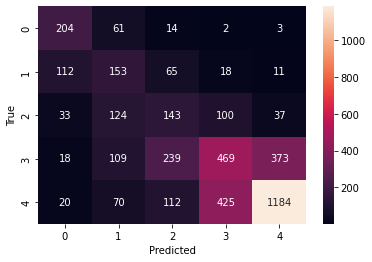

In [198]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')